## Update Showcase Chart

In [9]:
import yfinance as yf

from pathlib import Path

from mplchart.chart import Chart

from mplchart.primitives import Candlesticks, Volume
from mplchart.indicators import SMA, EMA, RSI, MACD

from matplotlib_inline.backend_inline import set_matplotlib_formats

set_matplotlib_formats("svg")

ROOT = Path.cwd().parent

In [10]:
ticker = "AAPL"
prices = yf.Ticker(ticker).history(period="5y")
prices

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-06-10 00:00:00-04:00,46.278821,47.137757,46.232978,46.464603,104883600,0.0,0.0
2019-06-11 00:00:00-04:00,47.014704,47.289757,46.710700,47.002640,107731600,0.0,0.0
2019-06-12 00:00:00-04:00,46.795155,47.282530,46.660041,46.853062,73012800,0.0,0.0
2019-06-13 00:00:00-04:00,46.976104,47.480367,46.710705,46.843403,86698400,0.0,0.0
2019-06-14 00:00:00-04:00,46.216091,46.708289,45.914498,46.503208,75046000,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-03 00:00:00-04:00,192.899994,194.990005,192.520004,194.029999,50080500,0.0,0.0
2024-06-04 00:00:00-04:00,194.639999,195.320007,193.029999,194.350006,47471400,0.0,0.0
2024-06-05 00:00:00-04:00,195.399994,196.899994,194.869995,195.869995,54156800,0.0,0.0


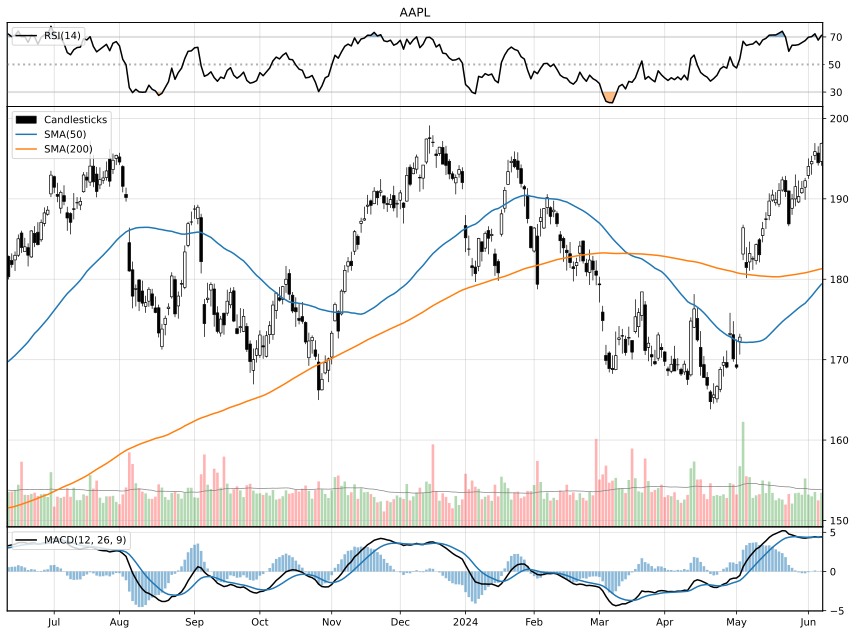

In [11]:
max_bars = 250

indicators = [
    Candlesticks(use_bars=False),
    SMA(50),
    SMA(200),
    Volume(),
    RSI(),
    MACD()
]

chart = Chart(title=ticker, max_bars=max_bars)
chart.plot(prices, indicators)

In [12]:
showcase = ROOT.joinpath("output/showcase.svg")

data = chart.render("svg")

print(f"Updating {showcase.name} ...")

showcase.write_bytes(data)

Updating showcase.svg ...


273725